# Stroke Prediction Dataset

Stroke Prediction Dataset from Kaggle  (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# Descriptive Data Analysis

In [ ]:
# !pip freeze > requirements.txt
!wget "https://drive.google.com/u/0/uc?id=1_G8S9dGwCM4cO1UdDoNp8Ek5hjCGRjSI&export=download" -O requirements.txt
!pip install -r requirements.txt

--2022-11-14 04:29:47--  https://drive.google.com/u/0/uc?id=1_G8S9dGwCM4cO1UdDoNp8Ek5hjCGRjSI&export=download
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.139, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1_G8S9dGwCM4cO1UdDoNp8Ek5hjCGRjSI&export=download [following]
--2022-11-14 04:29:48--  https://drive.google.com/uc?id=1_G8S9dGwCM4cO1UdDoNp8Ek5hjCGRjSI&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s6658ombm27lu9m3jvfin02q60mb7ig8/1668400125000/05031217625431847581/*/1_G8S9dGwCM4cO1UdDoNp8Ek5hjCGRjSI?e=download&uuid=7bf49861-e69c-439a-a2b8-3db0951b2ce5 [following]
--2022-11-14 04:29:48--  https://doc-08-68-docs.googleusercontent.com/do

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Suppress Warning in the Notebook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the data
data = pd.read_csv("https://drive.google.com/u/0/uc?id=1ijGU1viWpamsSBB5R0namiN2WouRYmnX&export=download")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Stroke statistics
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# Observe the Statistics of data
print('Size: ', data.size)
print('Shape: ', data.shape, '\n')
print('Statistical Values: ')
data.describe()

Size:  61320
Shape:  (5110, 12) 

Statistical Values: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Preprocessing

In [ ]:
# Drop id column
data.drop("id", axis = 1, inplace = True)

In [ ]:
# Check for Null and Missing values

rep_data=[data.dtypes, data.isna().sum(), data.isnull().sum(),data.nunique(axis=0, dropna=True)]
rep_col=['Datatype', 'na_Count', 'null_Count', 'Unique_Count']

data_report=pd.concat(rep_data, axis=1)
data_report.columns=rep_col
data_report

,Datatype,na_Count,null_Count,Unique_Count
gender,object,0,0,3
age,float64,0,0,104
hypertension,int64,0,0,2
heart_disease,int64,0,0,2
ever_married,object,0,0,2
work_type,object,0,0,5
Residence_type,object,0,0,2
avg_glucose_level,float64,0,0,3979
bmi,float64,201,201,418
smoking_status,object,0,0,4


In [ ]:
#sum of missing values per variable
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#filling the  missing values in bmi column with the mean of bmi values
from sklearn.impute import SimpleImputer 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data['bmi'] = imp_mean.fit_transform(data['bmi'].values.reshape(-1,1)) 
data.isna().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Drop 1 record belonging to 'Other' gender
data = data[data['gender'] != 'Other']

In [ ]:
# Create a new column for normalized age
data['age_norm']=(data['age']-data['age'].min())/(data['age'].max()-data['age'].min())

# Create a new column for normalized avg glucose level
data['avg_glucose_level_norm']=(data['avg_glucose_level']-data['avg_glucose_level'].min())/(data['avg_glucose_level'].max()-data['avg_glucose_level'].min())

# Create a new column for normalized bmi
data['bmi_norm']=(data['bmi']-data['bmi'].min())/(data['bmi'].max()-data['bmi'].min())

In [ ]:
# Discretize with respective equal-width bin
data['age_binned'] = pd.cut(data['age'], np.arange(0, 91, 5))
data['avg_glucose_level_binned'] = pd.cut(data['avg_glucose_level'], np.arange(0, 301, 10))
data['bmi_binned'] = pd.cut(data['bmi'], np.arange(0, 101, 5))

# Exploratory Data Analysis

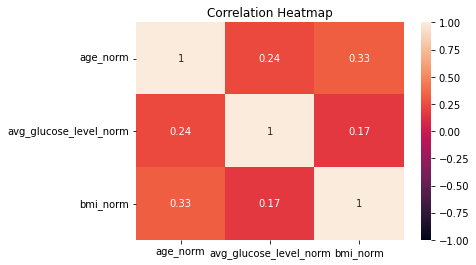

In [ ]:
# Create the correlation heatmap
heatmap = sns.heatmap(data[['age_norm', 'avg_glucose_level_norm', 'bmi_norm']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

In [ ]:
# Function for histogram display
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    data_pct = data.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    data_pct = data_pct.unstack()    
    return data_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

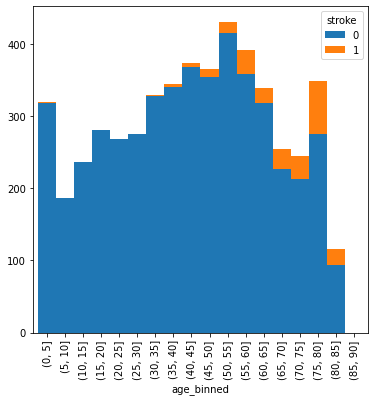

In [ ]:
#Stacked bar chart for age bins
get_stacked_bar_chart('age_binned')

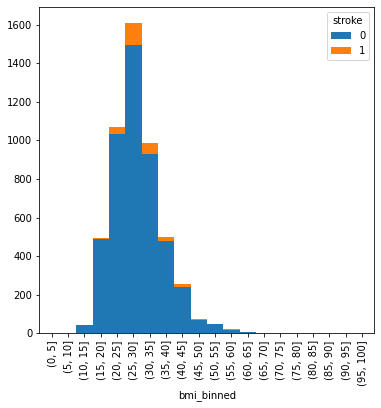

In [ ]:
#Stacked bar chart for bmi bins
get_stacked_bar_chart('bmi_binned')

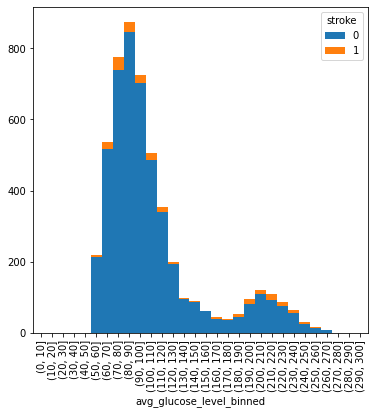

In [ ]:
#Stacked bar chart for average glucode level bins
get_stacked_bar_chart('avg_glucose_level_binned')

In [ ]:
# 100 % Stacked bar chart function
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    data_breakdown = data.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    data_total = data.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    data_pct = data_breakdown / data_total * 100
    # Create proper DataFrame's format
    data_pct = data_pct.unstack()
    return data_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

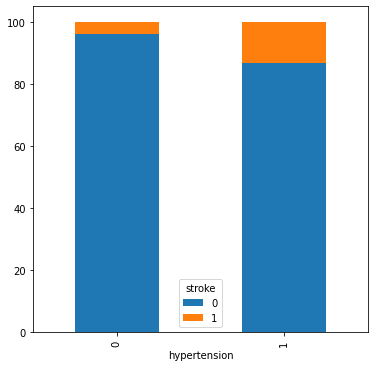

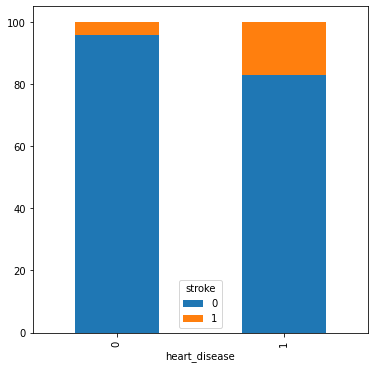

In [ ]:
# Categorical attributes
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

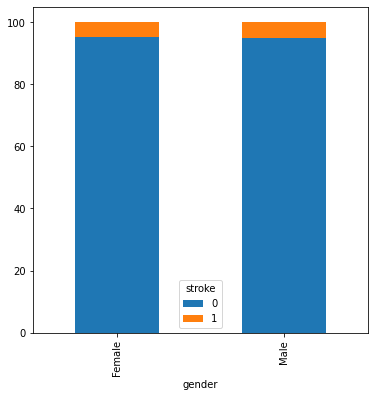

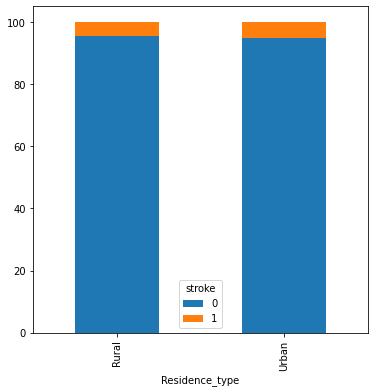

In [ ]:
# Gender, Residence type
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')

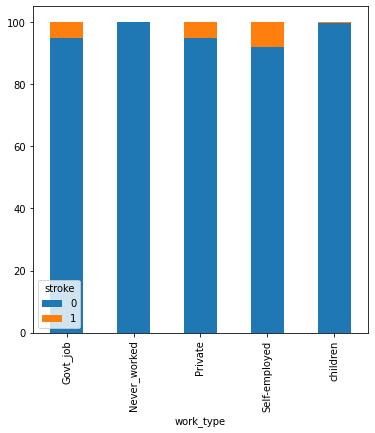

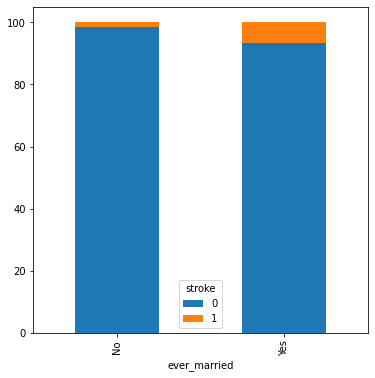

In [ ]:
# Work Type and Ever Married
get_100_percent_stacked_bar_chart('work_type')
get_100_percent_stacked_bar_chart('ever_married')

# Data Analysis Technique - Outlier Detection


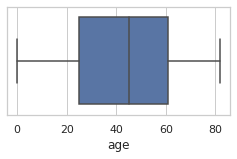

In [ ]:
# Identify outliers for age
sns.set(rc = {'figure.figsize':(4,2)},style="whitegrid")
sns.boxplot(x=data['age'])

In [ ]:
dataStroke = data[data['stroke'] > 0]
dataNonStroke = data[data['stroke'] < 1]

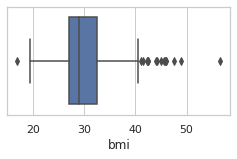

In [ ]:
# Identify outliers for bmi for stroke =1 cases
sns.set(rc = {'figure.figsize':(4,2)},style="whitegrid")
sns.boxplot(x=dataStroke['bmi'])

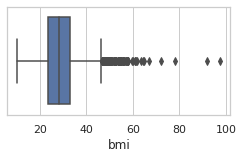

In [ ]:
# Identify outliers for bmi for stroke =0 cases
sns.set(rc = {'figure.figsize':(4,2)},style="whitegrid")
sns.boxplot(x=dataNonStroke['bmi'])

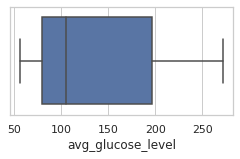

In [ ]:
# Identify outliers for average glucose level for stroke = 1 cases
sns.set(rc = {'figure.figsize':(4,2)},style="whitegrid")
sns.boxplot(x=dataStroke['avg_glucose_level'])

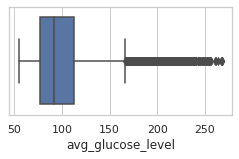

In [ ]:
# Identify outliers for average glucose level for stroke = 0 cases
sns.set(rc = {'figure.figsize':(4,2)},style="whitegrid")
sns.boxplot(x=dataNonStroke['avg_glucose_level'])

Summary of Outlier Analysis
- Age does not have any outliers
- BMI for stroke = 1 has outliers 
- BMI for stroke = 0 has outliers
- Average glucose level for stroke = 1 does not have outliers
- Average glucose level for stroke = 0 has significant outliers

# Data Analysis - Classification

##Naive Bayes Classification

Binned Datasets of "Age", "avg_glucose_level" & "bmi" are being used for Naive Bayes Clasiifier

In [ ]:
x = data.drop(['age','avg_glucose_level','bmi','stroke','age_norm','avg_glucose_level_norm','bmi_norm'],axis=1)
y = data[data.columns[10]]

In [ ]:
x

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_binned,avg_glucose_level_binned,bmi_binned
0,Male,0,1,Yes,Private,Urban,formerly smoked,"(65, 70]","(220, 230]","(35, 40]"
1,Female,0,0,Yes,Self-employed,Rural,never smoked,"(60, 65]","(200, 210]","(25, 30]"
2,Male,0,1,Yes,Private,Rural,never smoked,"(75, 80]","(100, 110]","(30, 35]"
3,Female,0,0,Yes,Private,Urban,smokes,"(45, 50]","(170, 180]","(30, 35]"
4,Female,1,0,Yes,Self-employed,Rural,never smoked,"(75, 80]","(170, 180]","(20, 25]"
...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,"(75, 80]","(80, 90]","(25, 30]"
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,"(80, 85]","(120, 130]","(35, 40]"
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,"(30, 35]","(80, 90]","(30, 35]"
5108,Male,0,0,Yes,Private,Rural,formerly smoked,"(50, 55]","(160, 170]","(25, 30]"


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [ ]:
class NaiveBayes:
  def __init__(self):
    self.features = list
    self.likelihoods = {}
    self.class_priors = {}
    self.pred_priors = {}

    self.x_train = np.array
    self.y_train = np.array
    self.train_size = int
    self.num_feats = int

  def fit(self,x,y):
    self.features = list(x.columns)
    self.x_train = x
    self.y_train = y
    self.train_size = x.shape[0]
    self.num_feats = x.shape[1]

    for features in self.features:
      self.likelihoods[features] = {}
      self.pred_priors[features] = {}

      for feat_val in np.unique(self.x_train[features].astype(str)):
        self.pred_priors[features].update({feat_val:0})
        
        for outcome in np.unique(self.y_train.astype(str)):
          self.likelihoods[features].update({feat_val+'_'+outcome:0})
          self.class_priors.update({outcome:0})

    self._calc_class_prior()
    self._calc_likelihoods()
    self._calc_predictor_prior()
  
  def _calc_class_prior(self):
    for outcome in np.unique(self.y_train):
      outcome_count = sum(self.y_train == outcome)
      self.class_priors[outcome] = outcome_count / self.train_size

  def _calc_likelihoods(self):
    for feature in self.features:

      for outcome in np.unique(self.y_train):
        outcome_count = sum(self.y_train == outcome)
        feat_likelihood = self.x_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()
        
        for feat_val, count in feat_likelihood.items():
          self.likelihoods[feature][str(feat_val) + '_' + str(outcome)] = count/outcome_count

  def _calc_predictor_prior(self):
   for feature in self.features:
    feat_vals = self.x_train[feature].value_counts().to_dict()

    for feat_val, count in feat_vals.items():
      self.pred_priors[feature][str(feat_val)] = count/self.train_size

  def predict(self, X):
    
    results = []
    X = np.array(X)

    for query in X:
      probs_outcome = {}
      for outcome in np.unique(self.y_train):
        prior = self.class_priors[outcome]
        likelihood = 1
        evidence = 1
        
        for feat, feat_val in zip(self.features, query):
          likelihood *= self.likelihoods[feat][str(feat_val) + '_' + str(outcome)]
          evidence *= self.pred_priors[feat][feat_val]

        if(evidence!=0):
          posterior = (likelihood * prior) / (evidence)
        else:
          print("No Such Event")

        probs_outcome[outcome] = posterior

      result = max(probs_outcome, key = lambda x: probs_outcome[x])
      results.append(result)

    return np.array(results)

In [ ]:
nbc = NaiveBayes()
nbc.fit(x,y)

To Test the Model following queries are used

In [ ]:
query = np.array([['Male','0','1','Yes','Private','Urban','formerly smoked','(65, 70]','(220, 230]','(35, 40]']])
print("Query Result - {}----> {}".format(query,nbc.predict(query)))

Query Result - [['Male' '0' '1' 'Yes' 'Private' 'Urban' 'formerly smoked' '(65, 70]'
  '(220, 230]' '(35, 40]']]----> [1]


In [ ]:
query = np.array([['Male','0','0','Yes','Private','Rural','formerly smoked','(50, 55]','(160, 170]','(25, 30]']])
print("Query Result - {}----> {}".format(query,nbc.predict(query)))

Query Result - [['Male' '0' '0' 'Yes' 'Private' 'Rural' 'formerly smoked' '(50, 55]'
  '(160, 170]' '(25, 30]']]----> [0]


# Data Analysis- K-Means Clustering

In [ ]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X.loc[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx in range(self.num_examples):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((list(X.loc[point_idx])-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X.loc[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        return y_pred

In [ ]:
# For Clustering choosing only 3 attributes for better visualization
df = data[['bmi','avg_glucose_level', 'age','stroke']]
# split the dataframe according to stroke value
df_stroke_1 = df[df['stroke']==1].drop(['stroke'], axis=1)
df_stroke_0 = df[df['stroke']==0].drop(['stroke'], axis=1)
df_stroke_1.reset_index(drop=True, inplace=True)
df_stroke_0.reset_index(drop=True, inplace=True)

# Clusters for stroke data
Kmeans_stroke_1 = KMeansClustering(df_stroke_1, 2)
y_pred_stroke_1 = Kmeans_stroke_1.fit(df_stroke_1)

# Clusters for non-stroke data
Kmeans_stroke_0 = KMeansClustering(df_stroke_0, 2)
y_pred_stroke_0 = Kmeans_stroke_0.fit(df_stroke_0)

# Appending Cluster column to stroke and non-stroke data
df_stroke_1['cluster'] = list(y_pred_stroke_1)
df_stroke_0['cluster'] = list(y_pred_stroke_0)

In [ ]:
df_stroke_1['cluster'].value_counts()

1.0    159
0.0     90
Name: cluster, dtype: int64

In [ ]:
df_stroke_0['cluster'].value_counts()

0.0    4181
1.0     679
Name: cluster, dtype: int64

In [ ]:
df_stroke_1.groupby(['cluster']).mean()

,bmi,avg_glucose_level,age
cluster,,,
0.0,32.492356,209.236222,69.088889
1.0,28.930298,89.134465,66.957987


In [ ]:
df_stroke_0.groupby(['cluster']).mean()

,bmi,avg_glucose_level,age
cluster,,,
0.0,28.289611,89.340895,39.711715
1.0,32.133945,199.901885,55.910162


In [ ]:
fig = px.scatter_3d(df_stroke_1[["bmi","age", "avg_glucose_level","cluster"]], x="bmi", y="age", z="avg_glucose_level", color="cluster", size="bmi", size_max=30)
fig.show()

In the above graph, we can see that there are 2 clusters formed for people who had Stroke.<br>
Characteristics of Yellow Cluster - 
*   BMI range: 20-45
*   Average Glucose: 50-150
*   Age: 30-80
<br>Characteristics of Blue Cluster - 
*   BMI range: 20-45
*   Average Glucose: 150-300
*   Age: 40-80
We see 2 distinct clusters separated by Average Glucose levels. These are the 2 risk groups for stroke. It can be concluded that people with similar characteristics are more susceptible to strokes.